In [8]:
#!/usr/bin/env python
# coding: utf-8

# In[105]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler


In [9]:
# In[106]:
# Load data from path
df01 = pd.read_csv("csv_experiments_WEB1.csv")
df02 = pd.read_csv("csv_experiments_WEB2.csv")
df03 = pd.read_csv("csv_experiments_WEB3.csv")
#df = pd.read_csv("RealData.csv")
# do renaming and selection
mapping01 = {
    "param__func__mp.input__cmd_start": "size",
    "param__func__de.upb.lb-nginx.0.1__cpu_bw": "CPU",
    "metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "throughput",
}

mapping02 = {
    "param__func__mp.input__cmd_start": "size",
    "param__func__de.upb.lb-haproxy.0.1__cpu_bw": "CPU",
    "metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "throughput",
}

mapping03 = {
    "param__func__mp.input__cmd_start": "size",
    "param__func__de.upb.px-squid.0.1__cpu_bw": "CPU",
    "metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "throughput",
}




In [10]:
def select_and_rename(df, mapping):
    """
    Helper: Selects columns of df using the keys
    of the mapping dict.
    It renames the columns to the values of the
    mappings dict.
    """
    # select subset of columns
    dff = df[list(mapping.keys())]
    # rename 
    for k, v in mapping.items():
        dff.rename(columns={k: v}, inplace=True)
    return dff

In [11]:
def sepBySize(df):
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 99999999 -e /tngbench_share/ab_dist.csv -s 60 -k -i http://20.0.0.254:8888/", "small")
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 99999999 -e /tngbench_share/ab_dist.csv -s 60 -k http://20.0.0.254:8888/bunny.mp4", "big")
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 99999999 -e /tngbench_share/ab_dist.csv -s 60 -k -i -X 20.0.0.254:3128 http://40.0.0.254:80/", "small")
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 99999999 -e /tngbench_share/ab_dist.csv -s 60 -k -X 20.0.0.254:3128 http://40.0.0.254:80/bunny.mp4", "big")
    return df


In [12]:
def showAndSave(df, size, name):
    print("NFV Data Visualization")
    data = []
    y = df['throughput']
    X = df[['CPU']]
    print(df.head())
    print("Info")
    print(df.info())
    print("Describe")
    print(df.describe())
    # Plotting
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(X,y)
    plt.show()
    df = df.drop(['size','vnf'],axis=1)
    data += df.values.tolist()
    df = pd.DataFrame(data, columns=['CPU','throughput'])
    df.to_csv("RealData_"+name+"_"+size+".csv", sep=',')

In [13]:
df01 = select_and_rename(df01, mapping01)
df02 = select_and_rename(df02, mapping02)
df03 = select_and_rename(df03, mapping03)
df01["vnf"] = "nginx"
df02["vnf"] = "haproxy"
df03["vnf"] = "squid"

#df_list = [df01, df02, df03]

df01 = sepBySize(df01)
df02 = sepBySize(df02)
df03 = sepBySize(df03)


df1_small = df01.loc[df01["size"] == "small"]
df1_big = df01.loc[df01["size"] == "big"]

df2_small = df02.loc[df02["size"] == "small"]
df2_big = df02.loc[df02["size"] == "big"]

df3_small = df03.loc[df03["size"] == "small"]
df3_big = df03.loc[df03["size"] == "big"]
#print(df['size'],df['MEM'],df['throughput'],df['CPU'])


NFV Data Visualization
    size  CPU  throughput    vnf
0  small  0.1      517.21  nginx
1  small  0.1      521.33  nginx
2  small  0.1      510.55  nginx
3  small  0.1      512.59  nginx
4  small  0.1      494.36  nginx
Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 1579
Data columns (total 4 columns):
size          800 non-null object
CPU           800 non-null float64
throughput    799 non-null float64
vnf           800 non-null object
dtypes: float64(2), object(2)
memory usage: 31.2+ KB
None
Describe
              CPU   throughput
count  800.000000   799.000000
mean     0.550000  1872.977497
std      0.287408   582.130701
min      0.100000   493.600000
25%      0.300000  1646.180000
50%      0.550000  2198.900000
75%      0.800000  2228.005000
max      1.000000  2292.680000


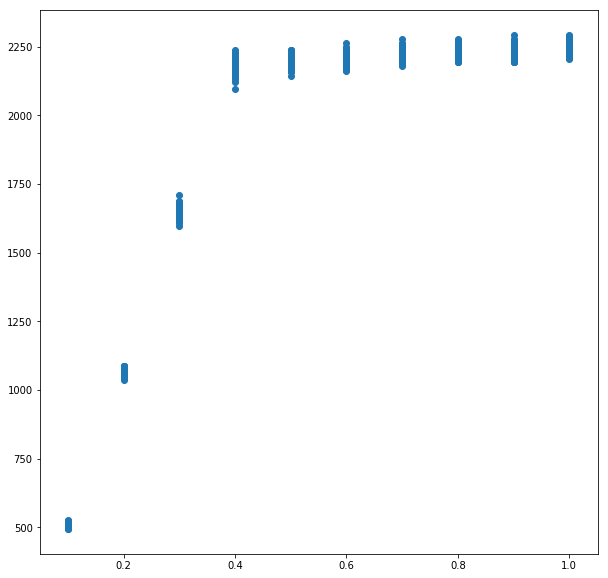

NFV Data Visualization
   size  CPU  throughput    vnf
20  big  0.1   114785.85  nginx
21  big  0.1   116672.10  nginx
22  big  0.1   112345.48  nginx
23  big  0.1   115348.88  nginx
24  big  0.1   113557.63  nginx
Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 20 to 1599
Data columns (total 4 columns):
size          800 non-null object
CPU           800 non-null float64
throughput    799 non-null float64
vnf           800 non-null object
dtypes: float64(2), object(2)
memory usage: 31.2+ KB
None
Describe
              CPU    throughput
count  800.000000  7.990000e+02
mean     0.550000  8.435743e+05
std      0.287408  4.682032e+05
min      0.100000  1.103421e+05
25%      0.300000  4.344270e+05
50%      0.550000  9.052645e+05
75%      0.800000  1.243057e+06
max      1.000000  1.598779e+06


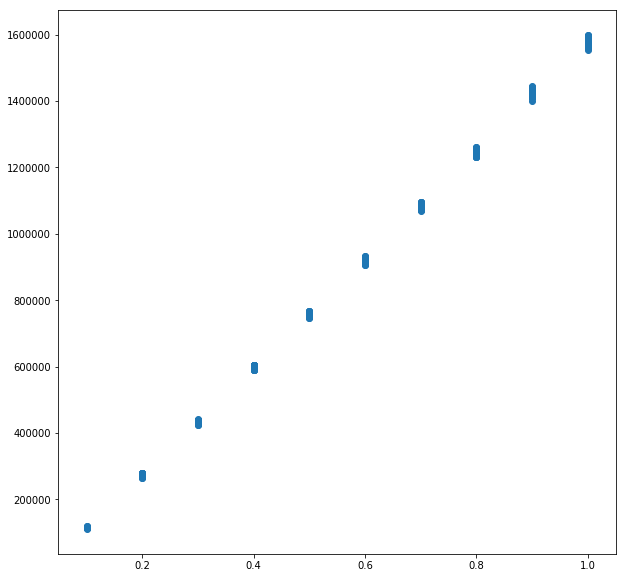

NFV Data Visualization
    size  CPU  throughput      vnf
0  small  0.1      132.54  haproxy
1  small  0.1      133.82  haproxy
2  small  0.1      134.81  haproxy
3  small  0.1      133.44  haproxy
4  small  0.1      132.43  haproxy
Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 1579
Data columns (total 4 columns):
size          800 non-null object
CPU           800 non-null float64
throughput    800 non-null float64
vnf           800 non-null object
dtypes: float64(2), object(2)
memory usage: 31.2+ KB
None
Describe
              CPU   throughput
count  800.000000   800.000000
mean     0.550000  1035.247712
std      0.287408   509.110544
min      0.100000   132.430000
25%      0.300000   528.800000
50%      0.550000  1356.815000
75%      0.800000  1468.805000
max      1.000000  1496.920000


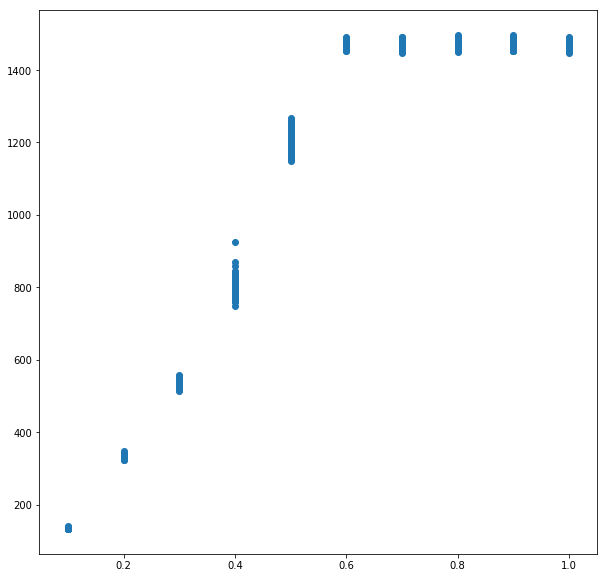

NFV Data Visualization
   size  CPU  throughput      vnf
20  big  0.1    49192.75  haproxy
21  big  0.1    50082.85  haproxy
22  big  0.1    49936.27  haproxy
23  big  0.1    49879.74  haproxy
24  big  0.1    47800.17  haproxy
Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 20 to 1599
Data columns (total 4 columns):
size          800 non-null object
CPU           800 non-null float64
throughput    800 non-null float64
vnf           800 non-null object
dtypes: float64(2), object(2)
memory usage: 31.2+ KB
None
Describe
              CPU     throughput
count  800.000000     800.000000
mean     0.550000  391121.643500
std      0.287408  223930.035609
min      0.100000   47112.290000
25%      0.300000  202593.722500
50%      0.550000  367637.085000
75%      0.800000  581665.452500
max      1.000000  786490.510000


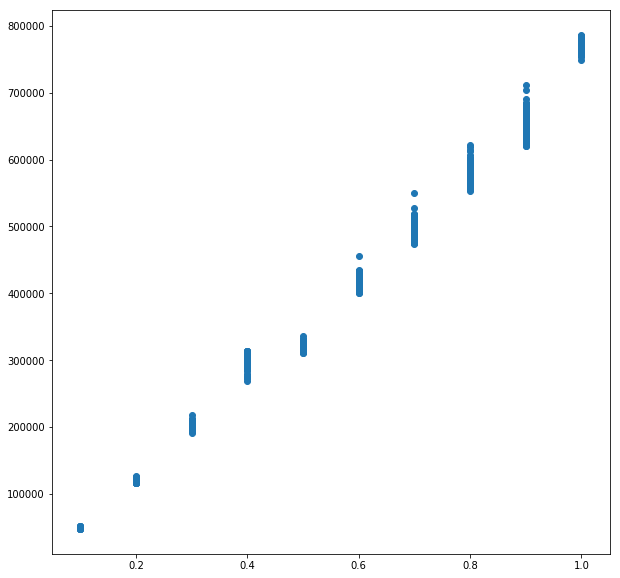

NFV Data Visualization
    size  CPU  throughput    vnf
0  small  0.1      248.58  squid
1  small  0.1      239.79  squid
2  small  0.1      243.37  squid
3  small  0.1      246.51  squid
4  small  0.1      243.09  squid
Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 1579
Data columns (total 4 columns):
size          800 non-null object
CPU           800 non-null float64
throughput    800 non-null float64
vnf           800 non-null object
dtypes: float64(2), object(2)
memory usage: 31.2+ KB
None
Describe
              CPU   throughput
count  800.000000   800.000000
mean     0.550000  1488.690800
std      0.287408   672.077677
min      0.100000   239.790000
25%      0.300000   910.892500
50%      0.550000  1719.285000
75%      0.800000  2108.045000
max      1.000000  2193.520000


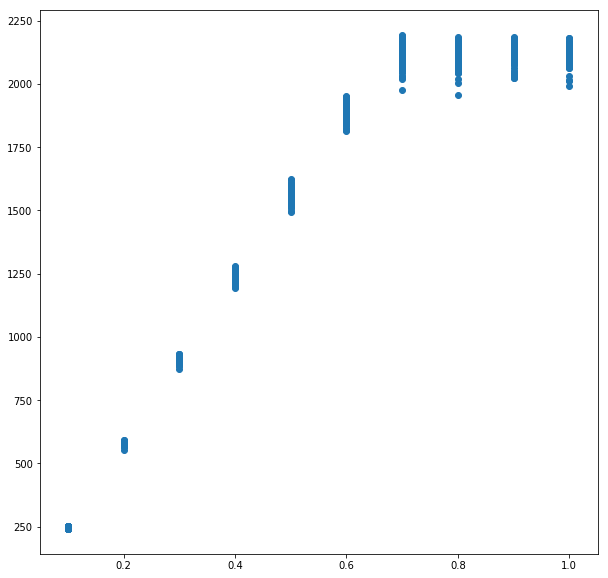

NFV Data Visualization
   size  CPU  throughput    vnf
20  big  0.1    30145.82  squid
21  big  0.1    30138.07  squid
22  big  0.1    31626.74  squid
23  big  0.1    30526.84  squid
24  big  0.1    30213.15  squid
Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 20 to 1599
Data columns (total 4 columns):
size          800 non-null object
CPU           800 non-null float64
throughput    800 non-null float64
vnf           800 non-null object
dtypes: float64(2), object(2)
memory usage: 31.2+ KB
None
Describe
              CPU     throughput
count  800.000000     800.000000
mean     0.550000  221051.328575
std      0.287408  122821.627261
min      0.100000   29729.520000
25%      0.300000  114481.537500
50%      0.550000  220024.750000
75%      0.800000  326010.985000
max      1.000000  427890.370000


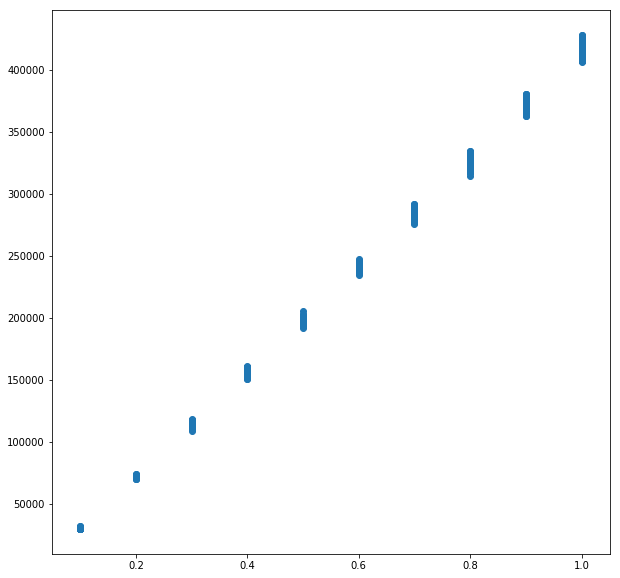

In [14]:
showAndSave(df1_small, "small", "nginx")
showAndSave(df1_big, "big", "nginx")

showAndSave(df2_small, "small", "haproxy")
showAndSave(df2_big, "big", "haproxy")

showAndSave(df3_small, "small", "squid")
showAndSave(df3_big, "big", "squid")